# Sequentially Comparing Forecasters: Comparison of Scoring Rules

Here, we run experiments analogous to [`nb_comparecast_synthetic.ipynb`](nb_comparecast_synthetic.ipynb) but with different choices of scoring rules (Brier, spherical, zero-one, truncated logarithmic, and Winkler).

See also: Section 5.1 in our paper.

YJ Choe [yjchoe@cmu.edu]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import comparecast as cc

## Hyperparameter Settings

In [2]:
# significance level
alpha = 0.05

# whether to use the log scale on x-axis (time)
use_logx = True

## Forecasts on Synthetic Data

The synthetic data as well as the forecasts are generated from the command line via:
```shell
python forecast.py -d default -n 10000 -f all -o forecasts/default.csv -p plots/default
```

In [3]:
data_name = "default"
data_file = f"forecasts/{data_name}.csv"
plots_dir = f"plots/{data_name}"

data = cc.get_data(data_file)
data[95:105]  # changepoint

,time,data,true_probs,laplace,k29_poly3,k29_rbf0.01,always_0.5,always_0,always_1
95,96,1,0.570657,0.556701,0.500977,0.561523,0.5,0.0,1.0
96,97,0,0.501050,0.551020,0.565430,0.562500,0.5,0.0,1.0
97,98,1,0.678587,0.555556,0.487305,0.560547,0.5,0.0,1.0
98,99,0,0.512691,0.550000,0.550781,0.562500,0.5,0.0,1.0
99,100,1,0.540199,0.554455,0.477539,0.560547,0.5,0.0,1.0
100,101,0,0.388315,0.549020,0.540039,0.561523,0.5,0.0,1.0
101,102,0,0.065224,0.543689,0.470703,0.559570,0.5,0.0,1.0
102,103,0,0.072952,0.538462,0.417969,0.557617,0.5,0.0,1.0
103,104,0,0.296940,0.533333,0.374023,0.555664,0.5,0.0,1.0
104,105,1,0.082688,0.537736,0.336914,0.553711,0.5,0.0,1.0


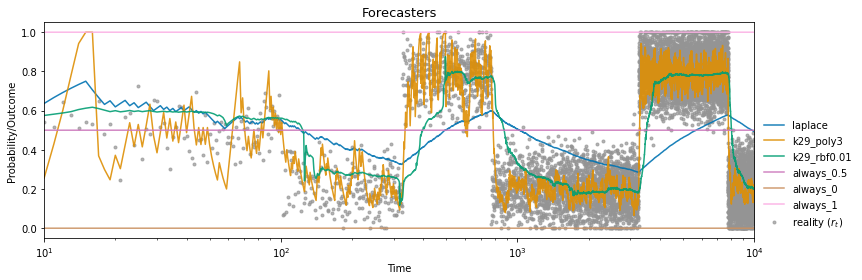

In [4]:
cc.plot_forecasts(data, ["all"], plots_dir, use_logx=use_logx)

## CS for $\Delta_t(\hat{p}_\text{k29-poly3}, \hat{p}_\text{laplace})$ for different scoring rules

*Bounds for the truncated logarithmic scoring rule:* $\log \epsilon \leq S_\epsilon(p, y) \leq 0$, with $\epsilon \in (0, 1)$, so
$$
\log \epsilon \leq S_\epsilon(p, y) - S_\epsilon(q, y) \leq -\log \epsilon
$$
For example, if $\epsilon = 0.01$, then $\log \epsilon \approx -4.6$.

In [5]:
# scoring_rule: (lo, hi)
scoring_rules = {
    "brier": (-1, 1), 
    "spherical": (-1, 1), 
    "zero_one": (-1, 1), 
    "logarithmic": (np.log(0.01), -np.log(0.01)),
}

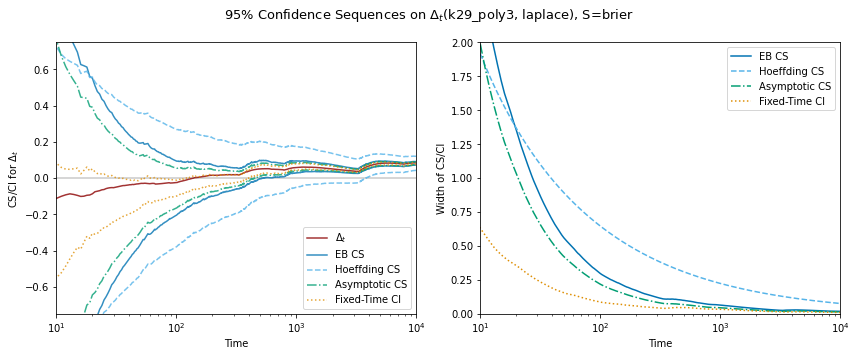

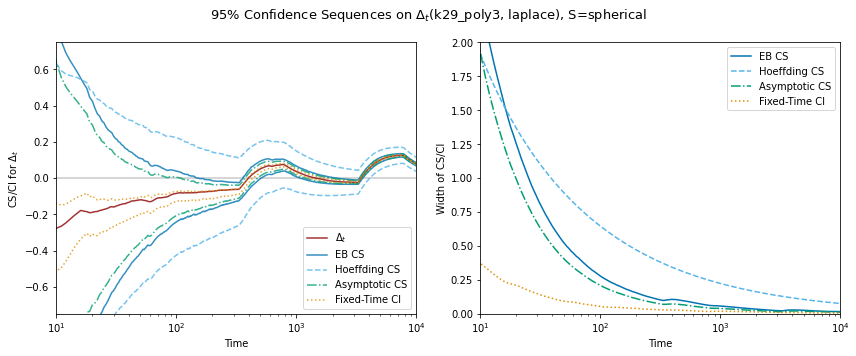

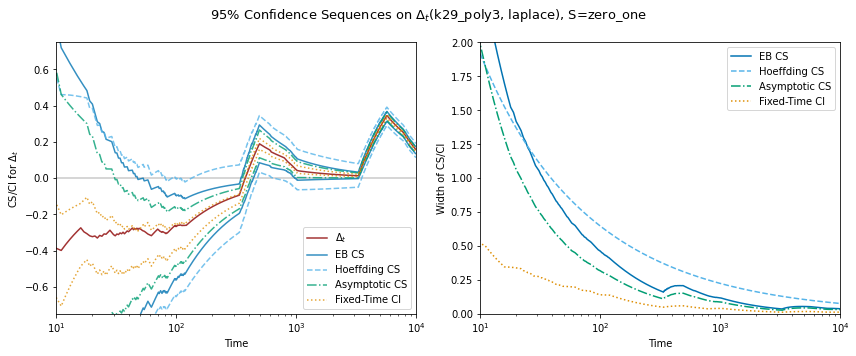

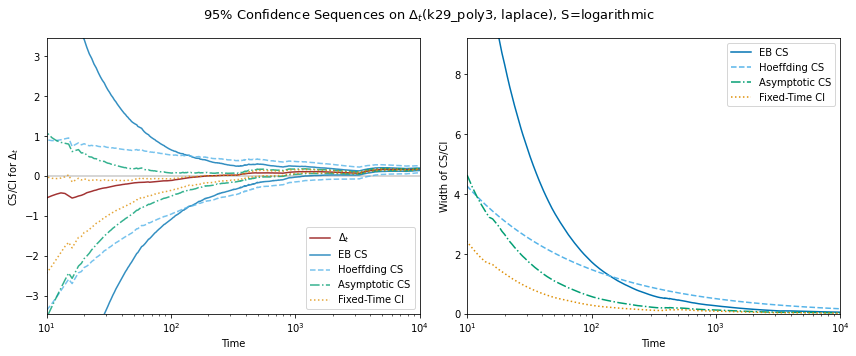

In [6]:
name_p = "k29_poly3"
name_q = "laplace"

for scoring_rule, (lo, hi) in scoring_rules.items():
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        name_q, 
        scoring_rule=scoring_rule,    
        plots_dir=plots_dir, 
        alpha=alpha,
        lo=lo,
        hi=hi,
        compare_baselines=("h", "acs", "ci"),
        use_logx=use_logx,
    )

## CS for $\Delta_t(\hat{p}_\text{always-0}, \hat{p}_\text{always-1})$ for different scoring rules

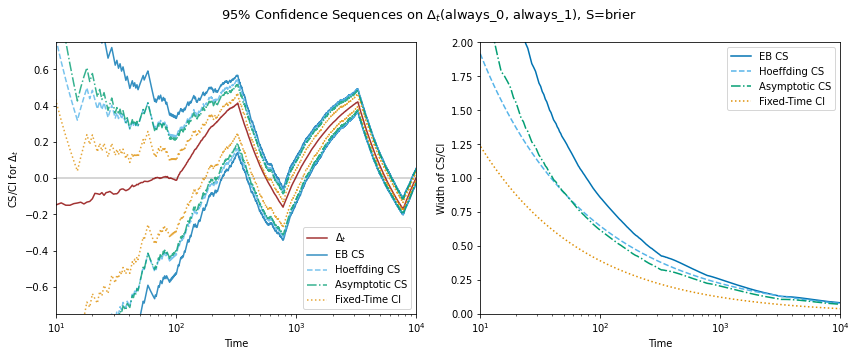

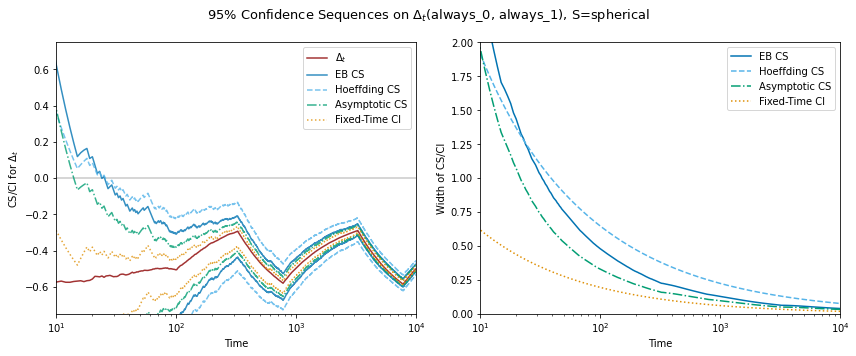

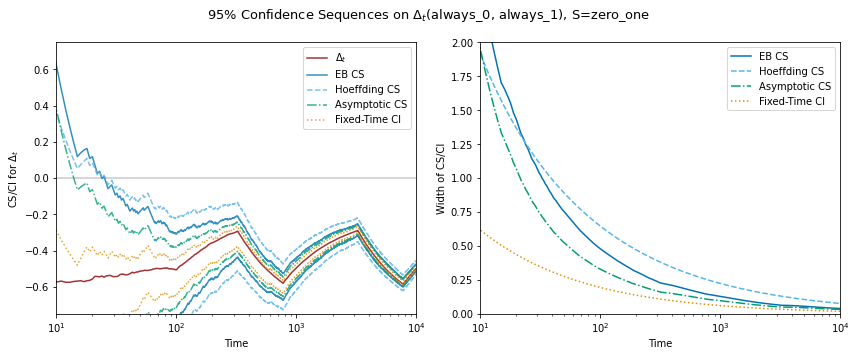

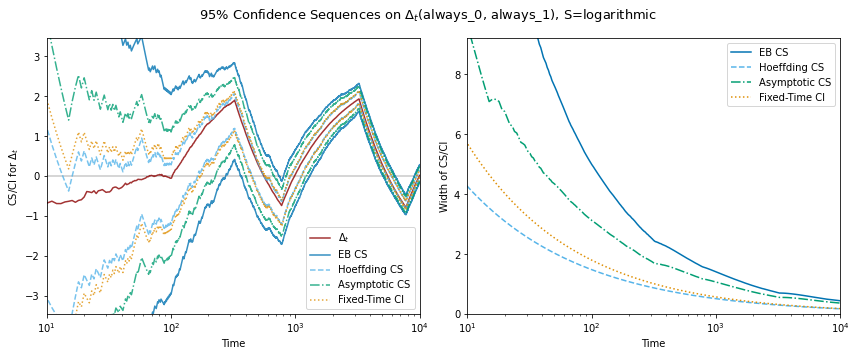

In [7]:
name_p = "always_0"
name_q = "always_1"

for scoring_rule, (lo, hi) in scoring_rules.items():
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        name_q, 
        scoring_rule=scoring_rule,    
        plots_dir=plots_dir, 
        alpha=alpha,
        lo=lo,
        hi=hi,
        compare_baselines=("h", "acs", "ci"),
        use_logx=use_logx,
    )

## Winkler's Normalized Scores

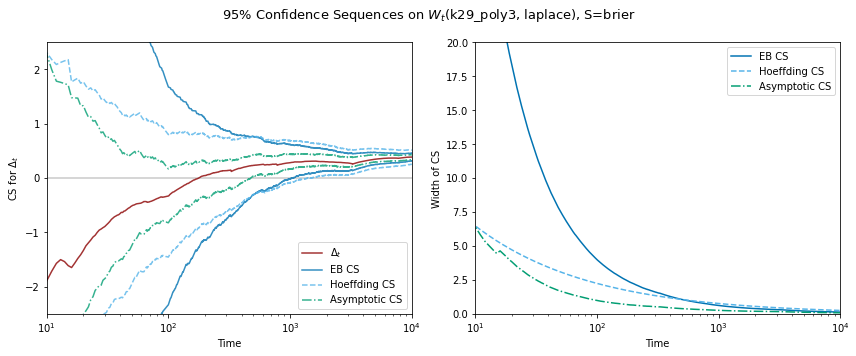

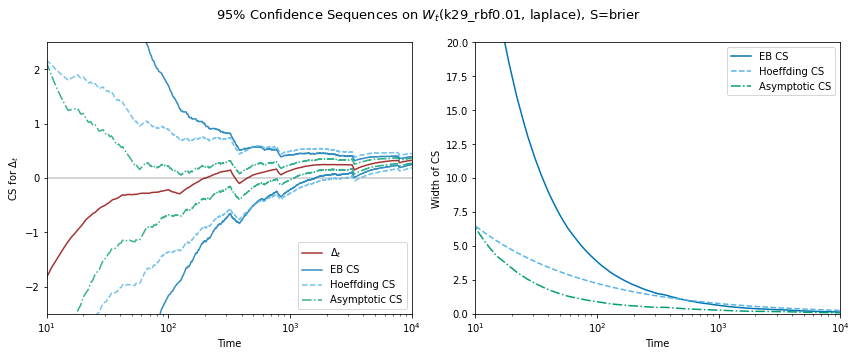

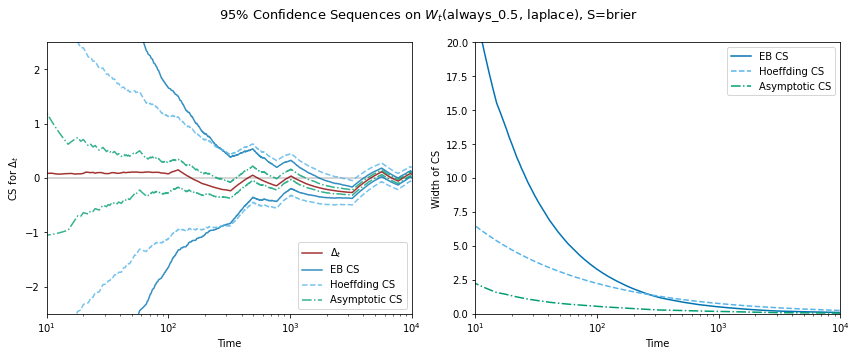

In [8]:
scoring_rule = "winkler"
baseline = "laplace"
q0 = 0.1
data[baseline] = data[baseline].clip(lower=q0, upper=1-q0)
lo, hi = 1 - 2/q0, 1
for name_p in ["k29_poly3", "k29_rbf0.01", "always_0.5"]:
    results, axes = cc.plot_comparison(
        data, 
        name_p, 
        baseline, 
        scoring_rule=scoring_rule,    
        plots_dir=plots_dir, 
        alpha=alpha,
        lo=lo,
        hi=hi,
        compare_baselines=("h", "acs"),
        use_logx=use_logx,
    ) 
#     axes[0].set(ylim=(-10, 1.05))
#     axes[1].set(ylim=(0, 10))